<a href="https://colab.research.google.com/github/kameshcodes/Generative-AI-Learnings/blob/main/RAGs_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. $\text{Data Ingestion Pipeline Implementation}$

 The first step of the data ingestion pipeline is $\text{extracting and spliting text}$ from the pdf documents

## Step 1: Installation

In [1]:
! pip install llama-index langchain PyPDF2 pdfminer.six -q
! pip install -U langchain-community -q

## Step 2: Load Pdf and Extract Text from it

In [2]:
from PyPDF2 import PdfReader

PATH = "/content/paper-1.pdf"


reader = PdfReader(PATH)

pages = reader.pages

In [3]:
pages

In [4]:
pages[0]

{'/Annots': [IndirectObject(270, 0, 135828519482704),
  IndirectObject(307, 0, 135828519482704),
  IndirectObject(271, 0, 135828519482704),
  IndirectObject(272, 0, 135828519482704),
  IndirectObject(308, 0, 135828519482704),
  IndirectObject(273, 0, 135828519482704),
  IndirectObject(274, 0, 135828519482704),
  IndirectObject(275, 0, 135828519482704),
  IndirectObject(276, 0, 135828519482704),
  IndirectObject(309, 0, 135828519482704),
  IndirectObject(277, 0, 135828519482704),
  IndirectObject(278, 0, 135828519482704),
  IndirectObject(279, 0, 135828519482704),
  IndirectObject(280, 0, 135828519482704),
  IndirectObject(281, 0, 135828519482704),
  IndirectObject(282, 0, 135828519482704),
  IndirectObject(284, 0, 135828519482704),
  IndirectObject(310, 0, 135828519482704),
  IndirectObject(283, 0, 135828519482704)],
 '/Contents': {'/Filter': '/FlateDecode'},
 '/MediaBox': [0, 0, 595.276, 841.89],
 '/Parent': {'/Count': 6,
  '/Kids': [IndirectObject(129, 0, 135828519482704),
   Indirec

In [5]:
pages[0].extract_text()

'Part-of-speech Tagging for Extremely Low-resource Indian Languages\nSanjeev Kumar, Preethi Jyothi, Pushpak Bhattacharyya\nComputer Science and Engineering, IIT Bombay, India\n{sanjeev, pjyothi, pb}@cse.iitb.ac.in\nAbstract\nModern natural language processing (NLP) sys-\ntems thrive when given access to large datasets.\nHowever, a large fraction of the world’s lan-\nguages are not privy to such benefits due to\nsparse documentation and inadequate digital\nrepresentation. This is especially true for In-\ndian regional languages. As a first step towards\nexpanding the reach of NLP technologies to\nextremely low-resource Indian languages, we\npresent a new parallel part-of-speech (POS)\nevaluation dataset for Angika, Magahi, Bho-\njpuri and Hindi. Angika, Magahi, Bhojpuri,\nalong with the more well-known Hindi, are all\nlanguages spoken in the Indian states of Bi-\nhar, Jharkhand and West Bengal. Ours is no-\ntably the first NLP resource, even for a shallow\nNLP task like POS-tagging, for

In [6]:
documents = []
for page in pages:
  documents.append(page.extract_text())

In [7]:
documents[0]

'Part-of-speech Tagging for Extremely Low-resource Indian Languages\nSanjeev Kumar, Preethi Jyothi, Pushpak Bhattacharyya\nComputer Science and Engineering, IIT Bombay, India\n{sanjeev, pjyothi, pb}@cse.iitb.ac.in\nAbstract\nModern natural language processing (NLP) sys-\ntems thrive when given access to large datasets.\nHowever, a large fraction of the world’s lan-\nguages are not privy to such benefits due to\nsparse documentation and inadequate digital\nrepresentation. This is especially true for In-\ndian regional languages. As a first step towards\nexpanding the reach of NLP technologies to\nextremely low-resource Indian languages, we\npresent a new parallel part-of-speech (POS)\nevaluation dataset for Angika, Magahi, Bho-\njpuri and Hindi. Angika, Magahi, Bhojpuri,\nalong with the more well-known Hindi, are all\nlanguages spoken in the Indian states of Bi-\nhar, Jharkhand and West Bengal. Ours is no-\ntably the first NLP resource, even for a shallow\nNLP task like POS-tagging, for

In [8]:
print(len(documents))
print()
documents

10



['Part-of-speech Tagging for Extremely Low-resource Indian Languages\nSanjeev Kumar, Preethi Jyothi, Pushpak Bhattacharyya\nComputer Science and Engineering, IIT Bombay, India\n{sanjeev, pjyothi, pb}@cse.iitb.ac.in\nAbstract\nModern natural language processing (NLP) sys-\ntems thrive when given access to large datasets.\nHowever, a large fraction of the world’s lan-\nguages are not privy to such benefits due to\nsparse documentation and inadequate digital\nrepresentation. This is especially true for In-\ndian regional languages. As a first step towards\nexpanding the reach of NLP technologies to\nextremely low-resource Indian languages, we\npresent a new parallel part-of-speech (POS)\nevaluation dataset for Angika, Magahi, Bho-\njpuri and Hindi. Angika, Magahi, Bhojpuri,\nalong with the more well-known Hindi, are all\nlanguages spoken in the Indian states of Bi-\nhar, Jharkhand and West Bengal. Ours is no-\ntably the first NLP resource, even for a shallow\nNLP task like POS-tagging, fo

<br>

- There are 10 element in the list $documents$, each representing a page.

---
---

### Document Processing for Vector Databases

- Every page is treated as a separate document, ready for embedding (vectorization) and storage in a vector database. However, varying page lengths can significantly affect search and retrieval quality.

- Since LLMs have a limited context window (token limit), we first concatenate all pages into a single long document, then split it into smaller, roughly equal-sized chunks. Each chunk is embedded and inserted into the vector database.



---
---

In [9]:
from langchain.document_loaders import PDFMinerLoader

loader = PDFMinerLoader(PATH)
pdf_content = loader.load()

In [10]:
pdf_content

[Document(metadata={'source': '/content/paper-1.pdf'}, page_content='Part-of-speech Tagging for Extremely Low-resource Indian Languages\n\nSanjeev Kumar, Preethi Jyothi, Pushpak Bhattacharyya\nComputer Science and Engineering, IIT Bombay, India\n{sanjeev, pjyothi, pb}@cse.iitb.ac.in\n\nAbstract\n\nModern natural language processing (NLP) sys-\ntems thrive when given access to large datasets.\nHowever, a large fraction of the world’s lan-\nguages are not privy to such benefits due to\nsparse documentation and inadequate digital\nrepresentation. This is especially true for In-\ndian regional languages. As a first step towards\nexpanding the reach of NLP technologies to\nextremely low-resource Indian languages, we\npresent a new parallel part-of-speech (POS)\nevaluation dataset for Angika, Magahi, Bho-\njpuri and Hindi. Angika, Magahi, Bhojpuri,\nalong with the more well-known Hindi, are all\nlanguages spoken in the Indian states of Bi-\nhar, Jharkhand and West Bengal. Ours is no-\ntably 

In [11]:
print(type(pdf_content), len(pdf_content))

<class 'list'> 1


- **Note that:** Here, It is not extracted page wise.

- **Note2 that:** Text is stored in **document object**. A Document object is a generic class for storing a piece of unstructured text and its associated metadata

## Step 3: Split the text into smaller chunks

There are several different text splitters.

<br>

Two common ones are:


**CharacterTextSplitter:** Split text based on a certain number characters.

**TokenTextSplitter:** Split text to tokens using model tokenizer.

In [12]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter, TokenTextSplitter

CHUNK_SIZE = 2000
CHUNK_OVERLAP = 200

text_splitter = CharacterTextSplitter(chunk_size = CHUNK_SIZE, chunk_overlap = CHUNK_OVERLAP)
docs = text_splitter.split_documents(pdf_content)

In [13]:
docs[0]

Document(metadata={'source': '/content/paper-1.pdf'}, page_content='Part-of-speech Tagging for Extremely Low-resource Indian Languages\n\nSanjeev Kumar, Preethi Jyothi, Pushpak Bhattacharyya\nComputer Science and Engineering, IIT Bombay, India\n{sanjeev, pjyothi, pb}@cse.iitb.ac.in\n\nAbstract\n\nModern natural language processing (NLP) sys-\ntems thrive when given access to large datasets.\nHowever, a large fraction of the world’s lan-\nguages are not privy to such benefits due to\nsparse documentation and inadequate digital\nrepresentation. This is especially true for In-\ndian regional languages. As a first step towards\nexpanding the reach of NLP technologies to\nextremely low-resource Indian languages, we\npresent a new parallel part-of-speech (POS)\nevaluation dataset for Angika, Magahi, Bho-\njpuri and Hindi. Angika, Magahi, Bhojpuri,\nalong with the more well-known Hindi, are all\nlanguages spoken in the Indian states of Bi-\nhar, Jharkhand and West Bengal. Ours is no-\ntably t

In [14]:
print(len(docs))

23


## Step 4: Embed and store the documents in the vector database

In this step, we convert text chunks into embedding vectors using models from OpenAI, Hugging Face, Cohere, or a custom model. Model selection depends on:

- **Cost**: Using providers like OpenAI or Cohere can become costly at scale.
- **Latency and Speed**: Hosting a model reduces latency; using an API increases it.
- **Convenience**: Custom models require more resources and maintenance, while vendor APIs offer ease of use.


In [15]:
! pip install openai qdrant-client -q

In [16]:
import os
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Qdrant

In [17]:
OPENAI_API_KEY = "YOUR-API-KEY"
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [18]:
embeddings = OpenAIEmbeddings(model = 'text-embedding-ada-002')


q_drant = Qdrant.from_documents(docs,
                                embeddings,
                                path = '\tmp\local_qdrant',
                                collection_name = 'my_documents',
                                force_recreate = True)

<ipython-input-18-61146dfa453c>:1: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings(model = 'text-embedding-ada-002')


In [19]:
query = "What are tokenization inconsistency?"

found_docs = q_drant.similarity_search(query)

found_docs

[Document(metadata={'source': '/content/paper-1.pdf', '_id': 'ecdff49529d942de9f02218e5644486e', '_collection_name': 'my_documents'}, page_content='4.2 Tokenization Inconsistencies\n\nIn the case of extremely low-resource languages,\na pretrained tokenizer tends to break words into\nmultiple sub-word tokens. In our experiments, we\npredict POS tags for each token. Thus, sub-optimal\ntokenization can result in poor quality predictions.\nFor extremely low-resource languages, words may\nbe split all the way down into individual characters\nwhich makes the POS predictions even noisier. In\nSection 4.3, we propose a simple look-back scheme\nto alleviate some of the issues that stem from poor\ntokenization. In Section 4.4, we analyze how much\nwe could make up for tokenization challenges in\nan oracle setting if we had access to parallel data\nin Hindi.\n\n4.3\n\nInvestigating the impact of sub-word\n\nWhen a tokenizer breaks down words into sub-\nwords, these sub-words can get different tag

In [20]:
len(found_docs)

4

In [21]:
found_docs[1].page_content

'1https://www.github.com/snjev310/acl-24-pos\n\n\x0cand Cohn (2016) achieve successful POS tagging,\nespecially in low-resource languages (like Mala-\ngasy and Kinyarwanda), by combining word align-\nment with gold-standard data. Kim et al. (2017) im-\nplemented a BiLSTM model that utilizes word and\ncharacter embeddings to transfer knowledge with-\nout relying on parallel corpora. Another approach\nby Huck et al. (2019) introduces zero-shot tag-\nging, by projecting annotations from a related high-\nresource language, such as Russian for Ukrainian.\nMore recently, Dione et al. (2023) demonstrated\nsignificant improvements in POS tagging by using\nmultilingual pretrained LMs trained on typologi-\ncally diverse African languages. Recent work has\nalso employed modular learning (Lin et al., 2019;\nArtetxe et al., 2020; Pfeiffer et al., 2020; Min et al.,\n2023) techniques with multilingual pretrained lan-\nguage models (PLMs) to enable effective cross-\nlingual transfer to low-resource la

# Generation Component Implementation


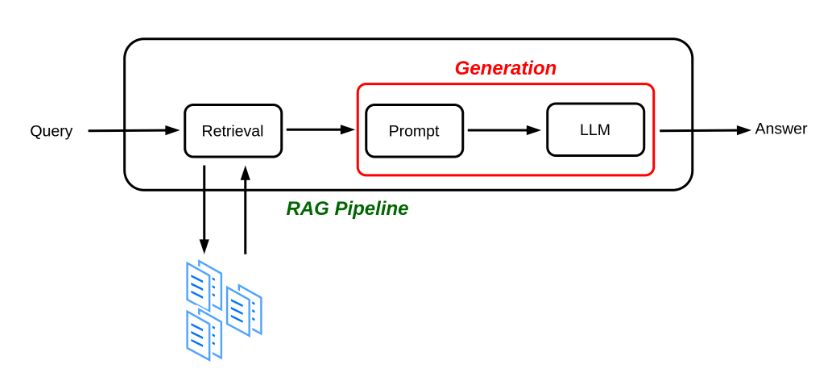

$\text{The steps for generating a response for a user’s question are:}$

**Step 1:** Embed the user’s query using the same model used for embedding documents

**Step 2:** Pass the query embedding to vector database, search and retrieve the top-k documents (i.e. context) from the vector database

**Step 3:** Create a “prompt” and include the user’s query and context in it

**Step 4:** Call the LLM and pass the the prompt

**Step 5:** Get the generated response from LLM and display it to the user


## load_qa_chain

`load_qa_chain()` is a function in Langchain that loads a pre-configured question-answering chain. It uses a language model like OpenAI and allows you to choose how to extract answers.

$\text{Note:}$ You can also add a prompt template and memory if you want. The function gives you a `QuestionAnsweringChain` that can take documents and questions to generate answers.


In [22]:
%pip install -qU langchain-openai

In [23]:
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import OpenAI

In [24]:
chain = load_qa_chain(llm=OpenAI(), chain_type='stuff')

<ipython-input-24-01856a8e0379>:1: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAI``.
  chain = load_qa_chain(llm=OpenAI(), chain_type='stuff')
<ipython-input-24-01856a8e0379>:1: LangChainDeprecationWarning: This class is deprecated. See the following migration guides for replacements based on `chain_type`:
stuff: https://python.langchain.com/v0.2/docs/versions/migrating_chains/stuff_docs_chain
map_reduce: https://python.langchain.com/v0.2/docs/versions/migrating_chains/map_reduce_chain
refine: https://python.langchain.com/v0.2/docs/versions/migrating_chains/refine_chain
map_rerank: https://python.langchain.com/v0.2/docs/versions/migrating_chains/map_rerank_docs_chain

See also guides on retrieval and q

In [25]:
query = 'What is tokenization inconsistency?'

In [26]:
found_docs = q_drant.similarity_search(query)

answer = chain.run(input_documents = found_docs, question = query)
print(answer)

<ipython-input-26-7e9b4cb4c5ea>:3: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  answer = chain.run(input_documents = found_docs, question = query)


 Tokenization inconsistency refers to the issue of a tokenizer breaking words into multiple sub-word tokens in extremely low-resource languages, resulting in poor quality predictions for POS tagging. This can be addressed through techniques such as look-back and look-back-with-score. 


## load_qa_with_sources_chain()

This is very similar to `load_qa_chain` except it contains sources/metadata along with the returned response.

In [27]:
from langchain.chains.qa_with_sources import load_qa_with_sources_chain


chain = load_qa_with_sources_chain(llm = OpenAI(), chain_type = 'stuff')


<ipython-input-27-7f9b5870f16e>:4: LangChainDeprecationWarning: This function is deprecated. Refer to this guide on retrieval and question answering with sources: https://python.langchain.com/v0.2/docs/how_to/qa_sources/
See also the following migration guides for replacements based on `chain_type`:
stuff: https://python.langchain.com/v0.2/docs/versions/migrating_chains/stuff_docs_chain
map_reduce: https://python.langchain.com/v0.2/docs/versions/migrating_chains/map_reduce_chain
refine: https://python.langchain.com/v0.2/docs/versions/migrating_chains/refine_chain
map_rerank: https://python.langchain.com/v0.2/docs/versions/migrating_chains/map_rerank_docs_chain

  chain = load_qa_with_sources_chain(llm = OpenAI(), chain_type = 'stuff')


In [28]:
query = 'What is tokenization inconsistency?'

In [29]:
answer = chain({'input_documents': found_docs, 'question':query}, return_only_outputs=True)

<ipython-input-29-8ea7e6327664>:1: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  answer = chain({'input_documents': found_docs, 'question':query}, return_only_outputs=True)


In [30]:
print(answer['output_text'])

 Tokenization inconsistency is a problem that arises in extremely low-resource languages when a pretrained tokenizer breaks words into multiple sub-word tokens, resulting in poor quality predictions for POS tags. To address this issue, a look-back approach is used, where the POS tags of all tokens in a word are substituted with the POS tag of the first token. This approach has shown significant improvements in performance for low-resource languages such as Angika. Other techniques, such as using a parallel corpus, have also been explored to improve POS tagging in these languages. However, there is a need for more NLP datasets covering extremely low-resource Indian languages and for developing parallel datasets with relatively higher-resource languages to better utilize cross-lingual transfer. SOURCES: /content/paper-1.pdf


## RetrievalQA()

`RetrievalQA` is a class in Langchain that creates a question answering chain using retrieval. It combines a retriever, prompt template, and LLM together into an end-to-end QA pipeline. The prompt template formats the question and retrieved documents into a prompt for the LLM. This chain retrieves relevant documents from a vector database for a given query, and then generates an answer using those documents.

In [31]:
from langchain.chains.question_answering import  load_qa_chain
from langchain.chains import RetrievalQA

In [32]:
chain = load_qa_chain(llm=OpenAI(temperature=0), chain_type='stuff')

answer = chain.run(input_documents = found_docs, question = query)
print(answer)

 Tokenization inconsistency refers to the issue of a tokenizer breaking words into multiple sub-word tokens, which can result in poor quality predictions for tasks such as POS tagging. This can be particularly problematic for extremely low-resource languages, where words may be split into individual characters, making the predictions even noisier.


In [33]:
chain = load_qa_chain(llm=OpenAI(temperature=0.5), chain_type='stuff')

answer = chain.run(input_documents = found_docs, question = query)
print(answer)

 Tokenization inconsistency refers to the issue of a pretrained tokenizer breaking words into multiple sub-word tokens, which can result in poor quality predictions for POS tagging tasks.
